# Machine Learning Models

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os 
import re
import string
from math import*
import jellyfish
import gensim
from os import path



In [94]:
import warnings
warnings.simplefilter('ignore')

In [5]:
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
#from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
#from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [6]:
df = pd.read_csv("D:/Stats&ML/quora-question-pairs/final_features.csv")

In [71]:
data=df.copy()

In [72]:
data.head()

,Unnamed: 0,id,is_duplicate,freq_qid1_x,freq_qid2_x,q1len_x,q2len_x,q1_n_words_x,q2_n_words_x,word_share_x,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0,0,0,1,1,66,57,"['What', 'is', 'the', 'step', 'by', 'step', 'g...","['What', 'is', 'the', 'step', 'by', 'step', 'g...",0.434783,...,-0.007711,-0.211688,0.418038,-0.469761,0.121139,-0.177316,0.209025,-0.285857,-0.377817,0.689402
1,1,1,0,4,1,51,88,"['What', 'is', 'the', 'story', 'of', 'Kohinoor...","['What', 'would', 'happen', 'if', 'the', 'Indi...",0.200000,...,0.048905,-0.106721,-0.087456,0.540074,0.057485,0.155638,-0.061117,0.114628,0.151169,-0.018621
2,2,2,0,1,1,73,59,"['How', 'can', 'I', 'increase', 'the', 'speed'...","['How', 'can', 'Internet', 'speed', 'be', 'inc...",0.166667,...,0.226636,-0.109853,-0.028152,0.248313,0.080669,0.422707,0.654455,0.143033,0.068402,-0.248437
3,3,3,0,1,1,50,65,"['Why', 'am', 'I', 'mentally', 'very', 'lonely...","['Find', 'the', 'remainder', 'when', '[math]23...",0.000000,...,-0.045801,-0.025937,0.072673,-0.315981,0.011530,-0.172984,0.377890,-0.311705,-0.049273,-0.011067
4,4,4,0,3,1,76,39,"['Which', 'one', 'dissolve', 'in', 'water', 'q...","['Which', 'fish', 'would', 'survive', 'in', 's...",0.100000,...,-0.136832,-0.743436,0.677039,-0.550221,0.073783,-0.135713,0.242017,-0.226520,-0.350575,0.233260


In [74]:
#data.drop(0, 1,inplace=True)

data.drop(['Unnamed: 0', 'id','q1_n_words_x','q2_n_words_x','q1_n_words_y','q2_n_words_y'], axis=1, inplace=True)

In [75]:
data.head()

,is_duplicate,freq_qid1_x,freq_qid2_x,q1len_x,q2len_x,word_share_x,freq_q1+q2_x,freq_q1-q2_x,cwc_min_x,cwc_max_x,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0,1,1,66,57,0.434783,2,0,0.999980,0.833319,...,-0.007711,-0.211688,0.418038,-0.469761,0.121139,-0.177316,0.209025,-0.285857,-0.377817,0.689402
1,0,4,1,51,88,0.200000,5,3,0.799984,0.399996,...,0.048905,-0.106721,-0.087456,0.540074,0.057485,0.155638,-0.061117,0.114628,0.151169,-0.018621
2,0,1,1,73,59,0.166667,2,0,0.399992,0.333328,...,0.226636,-0.109853,-0.028152,0.248313,0.080669,0.422707,0.654455,0.143033,0.068402,-0.248437
3,0,1,1,50,65,0.000000,2,0,0.000000,0.000000,...,-0.045801,-0.025937,0.072673,-0.315981,0.011530,-0.172984,0.377890,-0.311705,-0.049273,-0.011067
4,0,3,1,76,39,0.100000,4,2,0.399992,0.199998,...,-0.136832,-0.743436,0.677039,-0.550221,0.073783,-0.135713,0.242017,-0.226520,-0.350575,0.233260


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404287 entries, 0 to 404286
Columns: 237 entries, is_duplicate to 95_y
dtypes: float64(216), int64(21)
memory usage: 731.0 MB


In [77]:
cols = list(data.columns)
data = pd.DataFrame(np.array(data.values,dtype=np.float64),columns=cols)

In [78]:
nan_rows = data[data.isnull().any(1)]
print (nan_rows)

        is_duplicate  freq_qid1_x  freq_qid2_x  q1len_x  q2len_x  \
31239            0.0          1.0          1.0     31.0     49.0   
34755            0.0          7.0          1.0     87.0     39.0   
108977           0.0          1.0          1.0      1.0     35.0   
115346           0.0          2.0          9.0      1.0     47.0   
151921           0.0          2.0          1.0      1.0    132.0   
158777           0.0          1.0          2.0      1.0     51.0   
198912           0.0          1.0          1.0     13.0      1.0   
199109           0.0          1.0          1.0      1.0     69.0   
208482           1.0          1.0          1.0     66.0     53.0   
208483           0.0          1.0          1.0      1.0    101.0   
351786           0.0          1.0          1.0      2.0    148.0   
357125           0.0          1.0          3.0      1.0     29.0   

        word_share_x  freq_q1+q2_x  freq_q1-q2_x  cwc_min_x  cwc_max_x  \
31239       0.000000           2.0       

In [79]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame),"df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [80]:
data=clean_dataset(data)

In [81]:
nan_rows = data[data.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [is_duplicate, freq_qid1_x, freq_qid2_x, q1len_x, q2len_x, word_share_x, freq_q1+q2_x, freq_q1-q2_x, cwc_min_x, cwc_max_x, csc_min_x, csc_max_x, ctc_min_x, ctc_max_x, last_word_eq_x, first_word_eq_x, abs_len_diff_x, mean_len_x, token_set_ratio_x, token_sort_ratio_x, fuzz_ratio_x, fuzz_partial_ratio_x, longest_substr_ratio_x, freq_qid1_y, freq_qid2_y, q1len_y, q2len_y, word_share_y, freq_q1+q2_y, freq_q1-q2_y, cwc_min_y, cwc_max_y, csc_min_y, csc_max_y, ctc_min_y, ctc_max_y, last_word_eq_y, first_word_eq_y, abs_len_diff_y, mean_len_y, token_set_ratio_y, token_sort_ratio_y, fuzz_ratio_y, fuzz_partial_ratio_y, longest_substr_ratio_y, 0_x, 1_x, 2_x, 3_x, 4_x, 5_x, 6_x, 7_x, 8_x, 9_x, 10_x, 11_x, 12_x, 13_x, 14_x, 15_x, 16_x, 17_x, 18_x, 19_x, 20_x, 21_x, 22_x, 23_x, 24_x, 25_x, 26_x, 27_x, 28_x, 29_x, 30_x, 31_x, 32_x, 33_x, 34_x, 35_x, 36_x, 37_x, 38_x, 39_x, 40_x, 41_x, 42_x, 43_x, 44_x, 45_x, 46_x, 47_x, 48_x, 49_x, 50_x, 51_x, 52_x, 53_x, 54_x, ...]
Index: []



In [82]:
y_true = data['is_duplicate']
y_true = list(map(int, y_true.values))

# Random train test split( 70:30)

In [83]:
X_train,X_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.3,random_state=13)

In [84]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (282968, 237)
Number of data points in test data : (121273, 237)


In [85]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in test data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6307780385061208 Class 1:  0.36922196149387915
---------- Distribution of output variable in test data ----------
Class 0:  0.36922480684076425 Class 1:  0.36922480684076425


In [86]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
   
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

# Building a random model

Log loss on Test Data using Random Model 0.8868857105846685


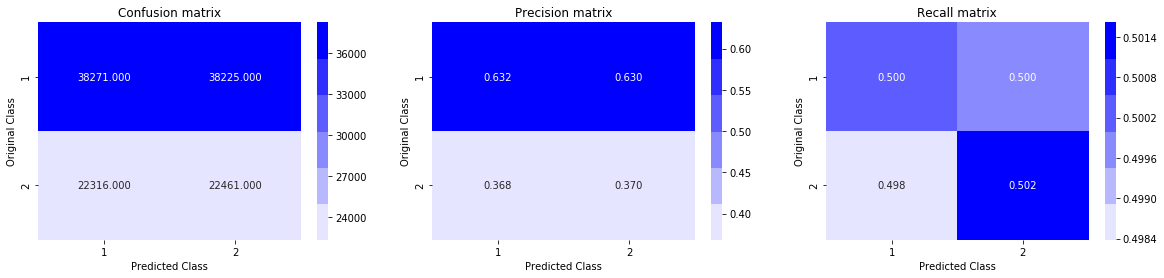

In [87]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

# Logistic Regression with hyperparameter tuning

For values of alpha =  1e-05 The log loss is: 0.6585418204934045
For values of alpha =  0.0001 The log loss is: 0.17977617438166563
For values of alpha =  0.001 The log loss is: 0.03750766569345121
For values of alpha =  0.01 The log loss is: 0.029714564939875173
For values of alpha =  0.1 The log loss is: 0.18470219284771344
For values of alpha =  1 The log loss is: 0.45998207403954894
For values of alpha =  10 The log loss is: 0.5341324550357134


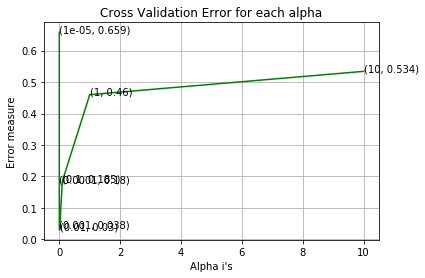

For values of best alpha =  0.01 The train log loss is: 0.02940138478828192
For values of best alpha =  0.01 The test log loss is: 0.029714564939875173
Total number of data points : 121273


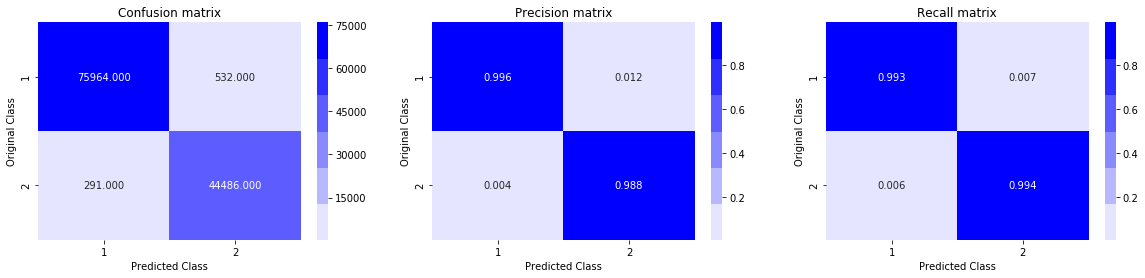

In [95]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# SDG with Feature scaling

In [96]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_sc = scale.fit_transform(X_train)
X_test_sc = scale.transform(X_test)

For values of alpha =  1e-05 The log loss is: 7.134576478045448e-06
For values of alpha =  0.0001 The log loss is: 3.459650256568698e-09
For values of alpha =  0.001 The log loss is: 3.356598323808074e-05
For values of alpha =  0.01 The log loss is: 0.00023373584049624205
For values of alpha =  0.1 The log loss is: 0.0038228761676479353
For values of alpha =  1 The log loss is: 0.2570018162220569
For values of alpha =  10 The log loss is: 0.45965678318101466


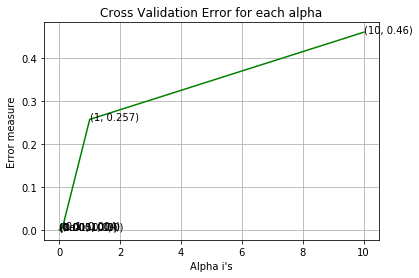

For values of best alpha =  0.0001 The train log loss is: 3.4618867963311787e-09
For values of best alpha =  0.0001 The test log loss is: 3.459650256568698e-09
Total number of data points : 121273


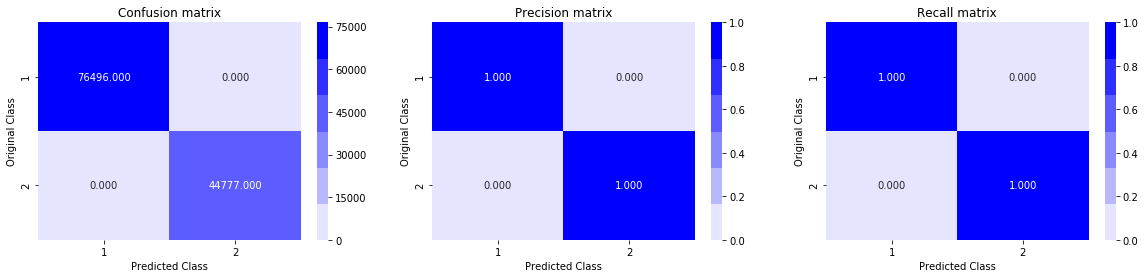

In [97]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_sc, y_train)
    predict_y = sig_clf.predict_proba(X_test_sc)
    log_error_array.append(log_loss(y_test, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_sc, y_train)

predict_y = sig_clf.predict_proba(X_train_sc)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_sc)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

For values of alpha =  0.000862 The log loss is: 3.172533959352067e-05
For values of alpha =  0.001017 The log loss is: 3.313394774343162e-05
For values of alpha =  0.001226 The log loss is: 3.29651654092703e-05
For values of alpha =  0.001482 The log loss is: 3.415070981101218e-05
For values of alpha =  0.00212 The log loss is: 4.168662640174994e-05
For values of alpha =  0.003 The log loss is: 6.15589473089204e-05
For values of alpha =  0.00314 The log loss is: 6.190595523328457e-05
For values of alpha =  0.003153 The log loss is: 6.196525207846827e-05
For values of alpha =  0.003568 The log loss is: 7.163118235760159e-05
For values of alpha =  0.003988 The log loss is: 8.39771952175646e-05
For values of alpha =  0.004111 The log loss is: 8.393936148067667e-05
For values of alpha =  0.005223 The log loss is: 0.0001145060448347157
For values of alpha =  0.005941 The log loss is: 0.00015710511302891158
For values of alpha =  0.00595 The log loss is: 0.000156875920355119


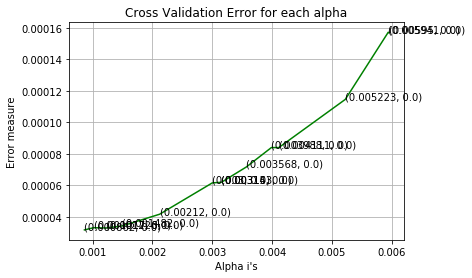

For values of best alpha =  0.000862 The train log loss is: 3.694892564766056e-05
For values of best alpha =  0.000862 The test log loss is: 3.172533959352067e-05
Total number of data points : 121273


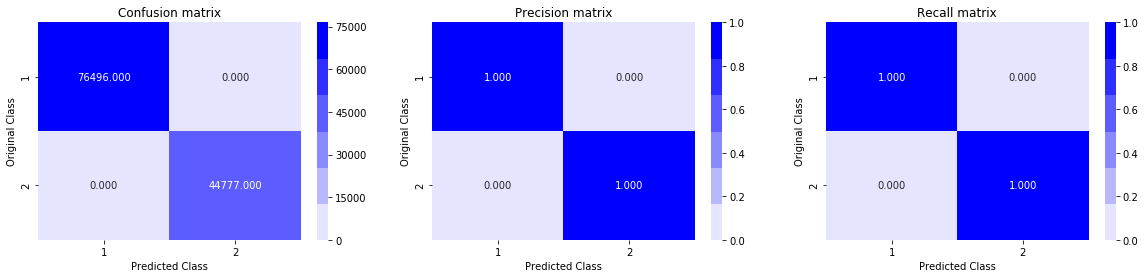

In [98]:
np.random.seed(45)
alpha = np.random.uniform(0.0006,0.006,14)
alpha = np.round(alpha,6)
alpha.sort()
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_sc, y_train)
    predict_y = sig_clf.predict_proba(X_test_sc)
    log_error_array.append(log_loss(y_test, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_sc, y_train)

predict_y = sig_clf.predict_proba(X_train_sc)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_sc)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# Linear SVM with hyperparameter tuning

For values of alpha =  1e-05 The log loss is: 0.6585418204934045
For values of alpha =  0.0001 The log loss is: 0.6585418204934045
For values of alpha =  0.001 The log loss is: 0.6585418204934045
For values of alpha =  0.01 The log loss is: 0.00014600888122860738
For values of alpha =  0.1 The log loss is: 2.1203120485949858e-05
For values of alpha =  1 The log loss is: 0.6585418205107708
For values of alpha =  10 The log loss is: 0.6585418205107456


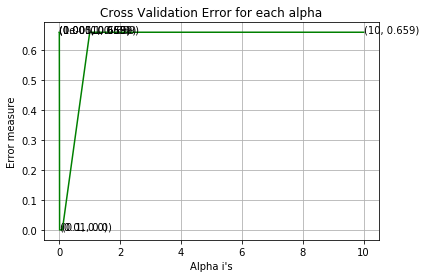

For values of best alpha =  0.1 The train log loss is: 2.120308660993846e-05
For values of best alpha =  0.1 The test log loss is: 2.1203120485949858e-05
Total number of data points : 121273


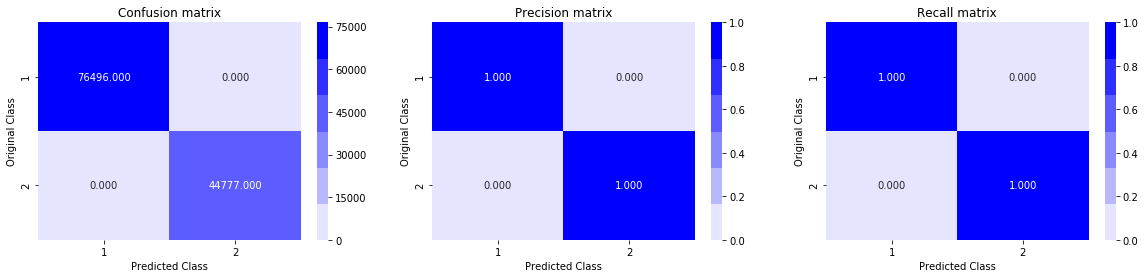

In [99]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_sc, y_train)
    predict_y = sig_clf.predict_proba(X_test_sc)
    log_error_array.append(log_loss(y_test, predict_y,eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y,eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_sc, y_train)

predict_y = sig_clf.predict_proba(X_train_sc)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_sc)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

For values of alpha =  1e-05 The log loss is: 2.989014221856114e-05
For values of alpha =  0.0001 The log loss is: 2.142961966836979e-05
For values of alpha =  0.001 The log loss is: 2.1324089499574572e-05
For values of alpha =  0.01 The log loss is: 2.1265900044286883e-05
For values of alpha =  0.1 The log loss is: 2.120432003365434e-05
For values of alpha =  1 The log loss is: 0.0024604120723812277
For values of alpha =  10 The log loss is: 0.43023712923638024


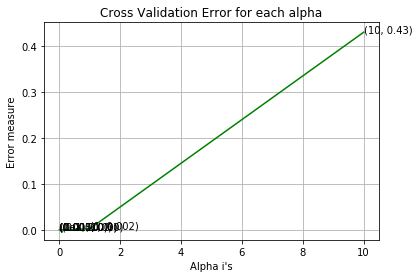

For values of best alpha =  0.1 The train log loss is: 2.1203767944970097e-05
For values of best alpha =  0.1 The test log loss is: 2.120432003365434e-05
Total number of data points : 121273


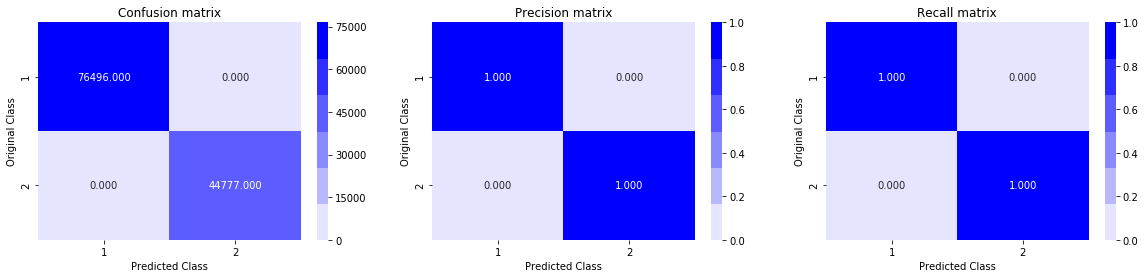

In [100]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_sc, y_train)
    predict_y = sig_clf.predict_proba(X_test_sc)
    log_error_array.append(log_loss(y_test, predict_y,eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y,eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_sc, y_train)

predict_y = sig_clf.predict_proba(X_train_sc)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_sc)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

For values of alpha =  0.00517 The log loss is: 2.1267887537658234e-05
For values of alpha =  0.00529 The log loss is: 2.1278972164103337e-05
For values of alpha =  0.00721 The log loss is: 2.1285343694936715e-05
For values of alpha =  0.00981 The log loss is: 2.1266790745027795e-05
For values of alpha =  0.01228 The log loss is: 2.1233643160405496e-05
For values of alpha =  0.01327 The log loss is: 2.1236797276080694e-05
For values of alpha =  0.01351 The log loss is: 2.1239897047980908e-05
For values of alpha =  0.01425 The log loss is: 2.122686222622116e-05
For values of alpha =  0.01452 The log loss is: 2.1236549027298903e-05
For values of alpha =  0.01757 The log loss is: 2.1230521820722586e-05
For values of alpha =  0.0183 The log loss is: 2.1225463105164257e-05
For values of alpha =  0.01839 The log loss is: 2.123225736791858e-05
For values of alpha =  0.02118 The log loss is: 2.1222513042995427e-05
For values of alpha =  0.02636 The log loss is: 2.1213408083547675e-05


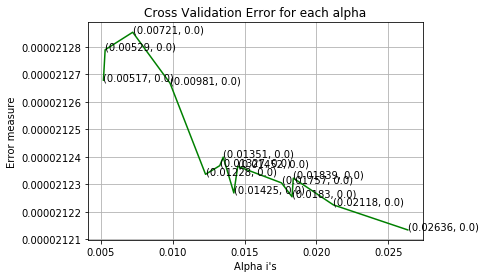

For values of best alpha =  0.02636 The train log loss is: 2.1210901083203152e-05
For values of best alpha =  0.02636 The test log loss is: 2.1213408083547675e-05
Total number of data points : 121273


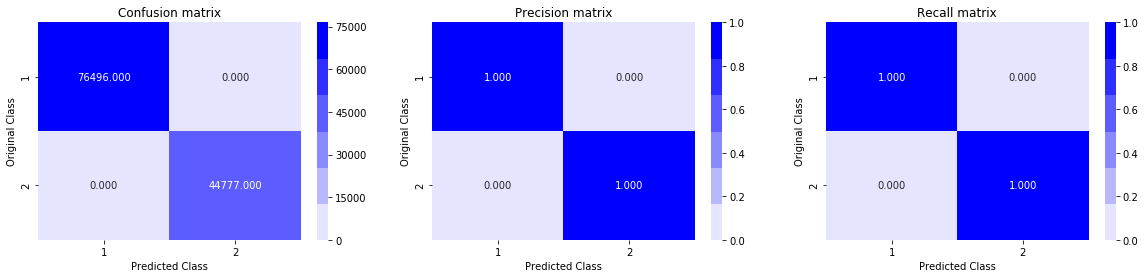

In [101]:
#alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------

np.random.seed(25)
alpha = np.random.uniform(0.002,0.03,14)
alpha = np.round(alpha,5)
alpha.sort()
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_sc, y_train)
    predict_y = sig_clf.predict_proba(X_test_sc)
    log_error_array.append(log_loss(y_test, predict_y,eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y,eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_sc, y_train)

predict_y = sig_clf.predict_proba(X_train_sc)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_sc)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier as RFC

estimators =  100 Train Log Loss  0.024342125774634245 Test Log Loss  0.069039346101041
estimators =  150 Train Log Loss  0.023421008324844863 Test Log Loss  0.06615151350101171
estimators =  200 Train Log Loss  0.023869735491400996 Test Log Loss  0.0677296540499725
estimators =  300 Train Log Loss  0.024437816796970033 Test Log Loss  0.06936856274859883
estimators =  400 Train Log Loss  0.023827202206894053 Test Log Loss  0.06755728021698956
estimators =  600 Train Log Loss  0.02457288300475618 Test Log Loss  0.0696940383943803
estimators =  800 Train Log Loss  0.02405320850964709 Test Log Loss  0.06826455940883915


Text(0, 0.5, 'Log Loss')

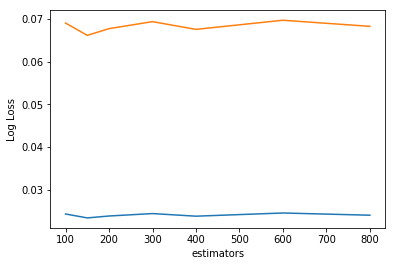

In [104]:
estimators = [100,150,200,300,400,600,800]
test_scores = []
train_scores = []
for i in estimators:
    clf = RFC(n_estimators=i,n_jobs=-1)
    clf.fit(X_train,y_train)
    predict_y = clf.predict_proba(X_train)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('estimators = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(estimators,train_scores,label='Train Log Loss')
plt.plot(estimators,test_scores,label='Test Log Loss')
plt.xlabel('estimators') 
plt.ylabel('Log Loss')

Depth =  5 Train Log Loss  0.2786073882905063 Test Log Loss  0.27934523765187497
Depth =  10 Train Log Loss  0.17232540122519888 Test Log Loss  0.17724483467389107
Depth =  12 Train Log Loss  0.12931750139003903 Test Log Loss  0.13858353707054105
Depth =  15 Train Log Loss  0.08464328758740337 Test Log Loss  0.1023639149040249
Depth =  20 Train Log Loss  0.047824704750836985 Test Log Loss  0.0810495662300497
Depth =  25 Train Log Loss  0.025791764582424846 Test Log Loss  0.06092078583881714
Depth =  50 Train Log Loss  0.02491391560699102 Test Log Loss  0.07064758895770239


Text(0, 0.5, 'Log Loss')

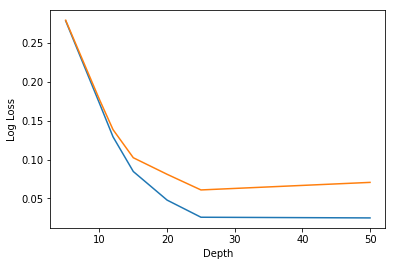

In [105]:
Depth = [5,10,12,15,20,25,50]
test_scores = []
train_scores = []
for i in Depth:
    clf = RFC(n_estimators=100,max_depth=i,n_jobs=-1)
    clf.fit(X_train,y_train)
    predict_y = clf.predict_proba(X_train)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('Depth = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(Depth,train_scores,label='Train Log Loss')
plt.plot(Depth,test_scores,label='Test Log Loss')
plt.xlabel('Depth') 
plt.ylabel('Log Loss')

estimators =  100 Train Log Loss  0.14325990476137115 Test Log Loss  0.14996465097942155
estimators =  150 Train Log Loss  0.15059290216576832 Test Log Loss  0.1574282784936169
estimators =  200 Train Log Loss  0.1335651278053222 Test Log Loss  0.14009020621880322
estimators =  300 Train Log Loss  0.13837408416247668 Test Log Loss  0.1447941083922388
estimators =  400 Train Log Loss  0.1466539152731357 Test Log Loss  0.1534828461304549
estimators =  600 Train Log Loss  0.12967277476316855 Test Log Loss  0.1358276305680821
estimators =  800 Train Log Loss  0.14285152287761108 Test Log Loss  0.14949142513803024


Text(0, 0.5, 'Log Loss')

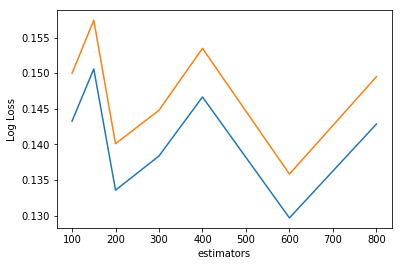

In [107]:
estimators = [100,150,200,300,400,600,800]
test_scores = []
train_scores = []
for i in estimators:
    clf = RFC(n_estimators=i,max_depth=11,n_jobs=-1)
    clf.fit(X_train,y_train)
    predict_y = clf.predict_proba(X_train)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('estimators = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(estimators,train_scores,label='Train Log Loss')
plt.plot(estimators,test_scores,label='Test Log Loss')
plt.xlabel('estimators') 
plt.ylabel('Log Loss')

# XGBoost

In [109]:
import xgboost as xgb

estimators =  100 Train Log Loss  2.7885249947536055e-05 Test Log Loss  2.7885258597169718e-05
estimators =  150 Train Log Loss  7.066936612518613e-06 Test Log Loss  7.0738462300632235e-06
estimators =  200 Train Log Loss  7.057117690045403e-06 Test Log Loss  7.064299822513801e-06
estimators =  300 Train Log Loss  7.05839145318552e-06 Test Log Loss  7.065548228244771e-06
estimators =  400 Train Log Loss  7.05839145318552e-06 Test Log Loss  7.065548228244771e-06
estimators =  600 Train Log Loss  7.05839145318552e-06 Test Log Loss  7.065548228244771e-06
estimators =  800 Train Log Loss  7.05839145318552e-06 Test Log Loss  7.065548228244771e-06


Text(0, 0.5, 'Log Loss')

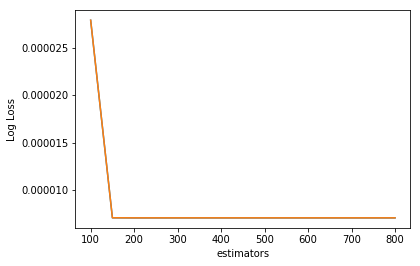

In [111]:
estimators = [100,150,200,300,400,600,800]
test_scores = []
train_scores = []
for i in estimators:
    clf = xgb.XGBClassifier(max_depth=3,learning_rate=0.1,n_estimators=i,n_jobs=-1)
    clf.fit(X_train,y_train)
    predict_y = clf.predict_proba(X_train)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('estimators = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(estimators,train_scores,label='Train Log Loss')
plt.plot(estimators,test_scores,label='Test Log Loss')
plt.xlabel('estimators')
plt.ylabel('Log Loss')

Learning Rate =  0.05 Train Log Loss  7.087653673887588e-06 Test Log Loss  7.097995747227813e-06
Learning Rate =  0.1 Train Log Loss  7.05839145318552e-06 Test Log Loss  7.065548228244771e-06
Learning Rate =  0.15 Train Log Loss  7.065985662413351e-06 Test Log Loss  7.077006103386671e-06
Learning Rate =  0.2 Train Log Loss  6.44068858015228e-06 Test Log Loss  6.4505558480645215e-06
Learning Rate =  0.25 Train Log Loss  6.28452664211573e-06 Test Log Loss  6.294900313455802e-06
Learning Rate =  0.3 Train Log Loss  6.2006827458296325e-06 Test Log Loss  6.2100319864825e-06


Text(0, 0.5, 'Log Loss')

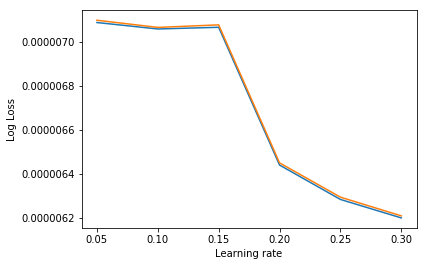

In [112]:
test_scores = []
train_scores = []
etas = [0.05,0.1,0.15,0.2,0.25,0.3]
for i in etas:
    clf = xgb.XGBClassifier(max_depth=3,learning_rate=i,n_estimators=350,n_jobs=-1)
    clf.fit(X_train,y_train)
    predict_y = clf.predict_proba(X_train)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('Learning Rate = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(etas,train_scores,label='Train Log Loss')
plt.plot(etas,test_scores,label='Test Log Loss')
plt.xlabel('Learning rate')
plt.ylabel('Log Loss')

reg_alpha =  0.5 Train Log Loss  7.3744729195944215e-06 Test Log Loss  7.3744810602592655e-06
reg_alpha =  1 Train Log Loss  7.092945434272983e-06 Test Log Loss  7.09295645808996e-06
reg_alpha =  5 Train Log Loss  3.532129081070338e-05 Test Log Loss  3.532134711867134e-05
reg_alpha =  10 Train Log Loss  7.068793859800332e-05 Test Log Loss  7.068805155744755e-05
reg_alpha =  50 Train Log Loss  0.00035349335662062406 Test Log Loss  0.0003534939215892525
reg_alpha =  100 Train Log Loss  0.0007070988696464629 Test Log Loss  0.0007070999998429166
reg_alpha =  150 Train Log Loss  0.0010608166111644405 Test Log Loss  0.0010608183068482474


Text(0, 0.5, 'Log Loss')

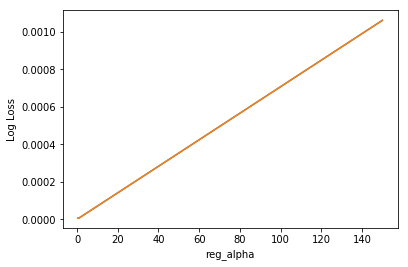

In [113]:
test_scores = []
train_scores = []
alpha = [0.5,1,5,10,50,100,150]
for i in alpha:
    clf = xgb.XGBClassifier(max_depth=3,learning_rate=0.65,n_estimators=370,reg_alpha=i,n_jobs=-1)
    clf.fit(X_train,y_train)
    predict_y = clf.predict_proba(X_train)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('reg_alpha = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(alpha,train_scores,label='Train Log Loss')
plt.plot(alpha,test_scores,label='Test Log Loss')
plt.xlabel('reg_alpha')
plt.ylabel('Log Loss')

The test log loss is: 0.000173420519248931


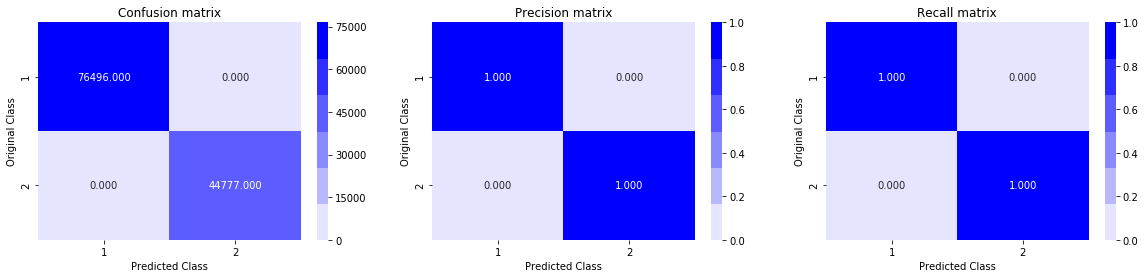

In [114]:
import xgboost as xgb
clf = xgb.XGBClassifier(max_depth=3,learning_rate=0.02,n_estimators=400,n_jobs=-1)
clf.fit(X_train,y_train)
predict_y = clf.predict_proba(X_test)
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test, predicted_y)

reg_alpha =  0.5 Train Log Loss  6.571182203006734e-06 Test Log Loss  6.5711896652763716e-06
reg_alpha =  1 Train Log Loss  7.055348133355708e-06 Test Log Loss  7.055359326768575e-06
reg_alpha =  5 Train Log Loss  3.532129081070338e-05 Test Log Loss  3.532134711867134e-05
reg_alpha =  10 Train Log Loss  7.068793859800332e-05 Test Log Loss  7.068805155744755e-05
reg_alpha =  50 Train Log Loss  0.00035349335662062406 Test Log Loss  0.0003534939215892525
reg_alpha =  100 Train Log Loss  0.0007070548119756532 Test Log Loss  0.0007070559418325839
reg_alpha =  150 Train Log Loss  0.001060778977147409 Test Log Loss  0.0010607806730009775


Text(0, 0.5, 'Log Loss')

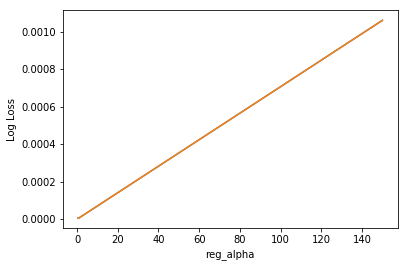

In [115]:
test_scores = []
train_scores = []
alpha = [0.5,1,5,10,50,100,150]
for i in alpha:
    clf = xgb.XGBClassifier(max_depth=3,learning_rate=0.95,n_estimators=250,reg_alpha=i,n_jobs=-1)
    clf.fit(X_train,y_train)
    predict_y = clf.predict_proba(X_train)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('reg_alpha = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(alpha,train_scores,label='Train Log Loss')
plt.plot(alpha,test_scores,label='Test Log Loss')
plt.xlabel('reg_alpha')
plt.ylabel('Log Loss')

The test log loss is: 0.0015266913134661614


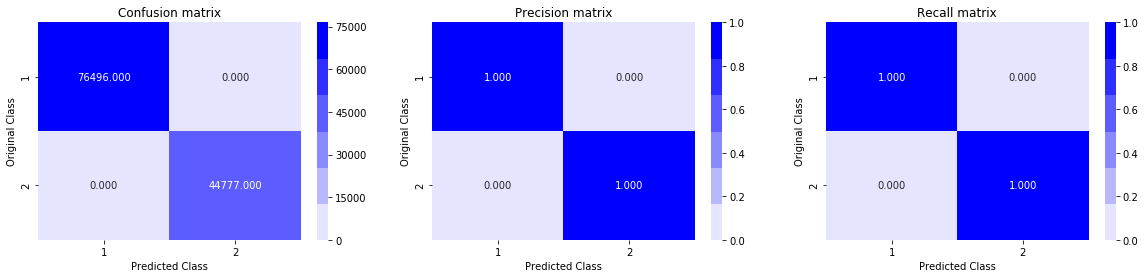

In [124]:
import xgboost as xgb
clf = xgb.XGBClassifier(max_depth=4,learning_rate=0.07,n_estimators=312,
                        min_child_weight=7,subsample=0.8,
                        reg_alpha=150,reg_lambda=368,
                        colsample_bytree=0.8,gamma=2,n_jobs=-1)
clf.fit(X_train,y_train)
predict_y = clf.predict_proba(X_test)
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test, predicted_y)